In [1]:
import pandas as pd
import sqlite3
from pandas.plotting import scatter_matrix

In [2]:
df = pd.read_csv('../data/ab-test.csv', sep=',')
df = df[df.group == 'test']
df

,uid,diff,time,group
0,user_1,-103.333333,after,test
1,user_1,-6.000000,before,test
2,user_18,-10.000000,after,test
3,user_18,-3.500000,before,test
4,user_19,-82.333333,after,test
5,user_19,-148.000000,before,test
6,user_21,-78.500000,after,test
7,user_21,-112.500000,before,test
8,user_25,-127.500000,after,test
9,user_25,-69.333333,before,test


In [3]:
conn = sqlite3.connect('../data/checking-logs.sqlite.sqlite')

In [4]:
commits = pd.io.sql.read_sql(
    """
    select uid, labname
    from checker
    WHERE labname != 'project1'
    """,
    conn
)
commits = commits.groupby('uid', as_index=False).labname.count()
commits.columns = ['uid', 'num_commits']

In [5]:
pageviews = pd.io.sql.read_sql(
    """
    select uid, count() as pageviews
    from pageviews
    group by uid
    """,
    conn
)
pageviews

,uid,pageviews
0,admin_0,3
1,admin_1,71
2,admin_2,1
3,admin_3,18
4,user_1,28
5,user_10,89
6,user_14,143
7,user_17,47
8,user_18,3
9,user_19,16


In [6]:
df = pd.merge(df, commits, on=['uid'])
df = pd.merge(df, pageviews, on=['uid'])
df

,uid,diff,time,group,num_commits,pageviews
0,user_1,-103.333333,after,test,62.0,28.0
1,user_1,-6.000000,before,test,62.0,28.0
2,user_18,-10.000000,after,test,5.0,3.0
3,user_18,-3.500000,before,test,5.0,3.0
4,user_19,-82.333333,after,test,118.0,16.0
5,user_19,-148.000000,before,test,118.0,16.0
6,user_21,-78.500000,after,test,65.0,10.0
7,user_21,-112.500000,before,test,65.0,10.0
8,user_25,-127.500000,after,test,79.0,179.0
9,user_25,-69.333333,before,test,79.0,179.0


In [7]:
df = df.drop(columns=['uid', 'group', 'time'])
df = df.rename(columns={'diff': 'avg_diff'})
df

,avg_diff,num_commits,pageviews
0,-103.333333,62.0,28.0
1,-6.000000,62.0,28.0
2,-10.000000,5.0,3.0
3,-3.500000,5.0,3.0
4,-82.333333,118.0,16.0
5,-148.000000,118.0,16.0
6,-78.500000,65.0,10.0
7,-112.500000,65.0,10.0
8,-127.500000,79.0,179.0
9,-69.333333,79.0,179.0


In [8]:
df=df.reindex(columns=['avg_diff', 'pageviews', 'num_commits'])
df

,avg_diff,pageviews,num_commits
0,-103.333333,28.0,62.0
1,-6.000000,28.0,62.0
2,-10.000000,3.0,5.0
3,-3.500000,3.0,5.0
4,-82.333333,16.0,118.0
5,-148.000000,16.0,118.0
6,-78.500000,10.0,65.0
7,-112.500000,10.0,65.0
8,-127.500000,179.0,79.0
9,-69.333333,179.0,79.0


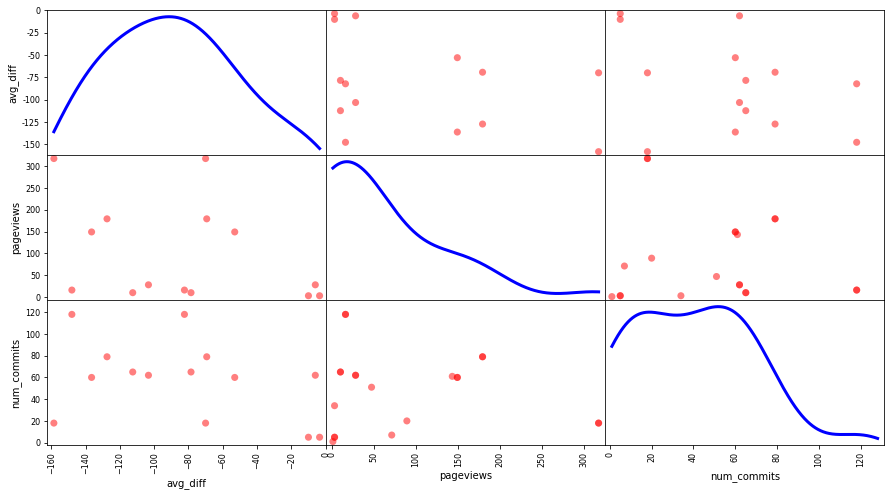

In [9]:
ax = scatter_matrix(df, figsize=(15, 8), diagonal='kde',
                    density_kwds=dict(color='blue', linewidth=3),
                    s=200, color='red')

In [ ]:
conn.close()

Can we say that if a user has a low number of pageviews then they likely
have a low number of commits?
NO

Can we say that if a user has a low number of pageviews then they likely have
a small average difference between the first commit and the lab deadline?
NO

Can we say that there are many users with a low number of commits and a
few with a high number of commits”
DA

Can we say that there are many users with a small average difference and a
few with a large average difference
NO

